# PATHWAY ABUNDANCE (fr now this time please)

## step 1: get all the packages in

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import wesanderson
import re

## step 2: load all necessary data

In [2]:
# bowtie hit summaries for propionate
compiled_bt_hit_summaries_allpathways = pd.read_csv("compiled_bt_hit_summaries_allpathways.csv")

# gene lengths 
allpathways_gene_catalogue_seqlengths = pd.read_csv("allpathways_gene_catalogue_seqlengths.csv").set_index("gene")

# gene information
allpathways_gene_info = pd.read_csv("allpathways_genesInCatalogue_long.csv")
allpathways_gene_info = allpathways_gene_info.drop(allpathways_gene_info.columns[0], axis=1).set_index("strain_gene")

## gene length correction (new, using formula proposed by RC, step 1 of it)

### the function for gene length correctin
note, this only does $hits\;of\;gene \cdot length(gene)$. The full formula is given as follows: $$

In [3]:
def gene_length_correction_new(gene_catalogue_seqlengths, compiled_bt_hit_summaries):

    gene_length_df = gene_catalogue_seqlengths

    df = compiled_bt_hit_summaries.drop(["pathway"], axis=1).set_index("read_accession")

    new = df.copy()

    # first replace the values in new with the gene length of that gene
    for gene in compiled_bt_hit_summaries:
        
        if gene in gene_length_df.index:
        
            gene_length = gene_length_df.loc[gene].at["length"]

            new[gene] = [gene_length] * len(new)

    # equivalent to hits of gene * length(gene)
    new = df.multiply(new)

    return new

### running the code for gene length correction

In [4]:
compiled_bt_hit_summaries_all_pathways_length_corrected = gene_length_correction_new(allpathways_gene_catalogue_seqlengths, compiled_bt_hit_summaries_allpathways)

compiled_bt_hit_summaries_all_pathways_length_corrected

Blautia-wexlerae-DSM-19850-MAF-2_Roseburia-inulivorans-pduCDE  \
read_accession                                                                  
ERR4330026                                               459772.0               
ERR4330027                                               104036.0               
ERR4330028                                                35238.0               
ERR4330029                                                20136.0               
ERR4330030                                                96485.0               
...                                                           ...               
SRR4052040                                                    NaN               
SRR4052041                                                    NaN               
SRR4052042                                                10907.0               
SRR4052043                                                  839.0               
SRR4052044                                                  839.0               

                Bacteroides-stercoris-ATCC-43183-MAF-2_rplB  \
read_accession                                                
ERR4330026                                         117232.0   
ERR4330027                                              NaN   
ERR4330028                                           3808.0   
ERR4330029                                           1088.0   
ERR4330030                                              NaN   
...                                                     ...   
SRR4052040                                              NaN   
SRR4052041                                              NaN   
SRR4052042                                              NaN   
SRR4052043                                           1088.0   
SRR4052044                                           1360.0   

                Bacteroides_vulgatus_rplB  \
read_accession                              
ERR4330026                        76976.0   
ERR4330027                         3808.0   
ERR4330028                         8432.0   
ERR4330029                        14960.0   
ERR4330030                         2448.0   
...                                   ...   
SRR4052040                            NaN   
SRR4052041                          272.0   
SRR4052042                          272.0   
SRR4052043                         5712.0   
SRR4052044                         9520.0   

                Blautia-wexlerae-DSM-19850-MAF-2_fucO  \
read_accession                                          
ERR4330026                                   102709.0   
ERR4330027                                    34110.0   
ERR4330028                                     5685.0   
ERR4330029                                    20845.0   
ERR4330030                                    20466.0   
...                                               ...   
SRR4052040                                        NaN   
SRR4052041                                        NaN   
SRR4052042                                    56850.0   
SRR4052043                                     1137.0   
SRR4052044                                        NaN   

                Acidaminococcus-intestini-D21-MAF-2_bcd  \
read_accession                                            
ERR4330026                                     132088.0   
ERR4330027                                          NaN   
ERR4330028                                      41712.0   
ERR4330029                                          NaN   
ERR4330030                                          NaN   
...                                                 ...   
SRR4052040                                          NaN   
SRR4052041                                          NaN   
SRR4052042                                          NaN   
SRR4052043                                      48664.0   
SRR4052044                                          NaN   

                Acidaminococcus-intestini-D21-

## useful setup for calculating pathway abundances

In [5]:
pathway_gene_lists = []
pathways = []
pathway_dict = {}
pathway_length_dict = {}

wrong_names_dict = {
    "P1_SP": "sodium-pumping decarboxylase",
    "P1_WWC": "Wood-Werkman Cycle",
    "P2": "acrylate pathway",
    "P3": "propanediol pathway"
}

# loop through the entire directory of gene lists
for file in os.listdir("geneLists"):

    file_n = "geneLists/" + str(file)

    # get the actual pathway from the filename
    pathway = str(file).replace("_gene_list.txt", "")

    if pathway in wrong_names_dict:
        pathway = wrong_names_dict[pathway]

    # get the list of genes in each file
    geneList = [line.rstrip() for line in open(file_n)]

    pathways.append(pathway)

    # this my way of bypassing that strange assign function from R
    pathway_dict[pathway] = geneList

    # pathway_length_dict[pathway + "_pathway_length"] = len(geneList)

    pathway_length_dict[pathway] = len(geneList)
    
    pathway_gene_lists.append(geneList)

# turn the gene pathways list of lists into a pandas dataframe, using `pathways` as the column names

gene_pathways_df = pd.DataFrame(pathway_gene_lists).transpose()

gene_pathways_df.columns = pathways

gene_pathways_df

acetylCoA_buk propanediol pathway  \
0            buk                fucO   
1            hbd                pduP   
2            ptb                pduC   
3            thl                pduD   
4            bcd                pduE   
5            cro                pduL   
6           None                pduW   
7           None                None   
8           None                None   
9           None                None   
10          None                None   

                     sodium-pumping decarboxylase aminobutyrate_buk  \
0             methylmalonyl-CoA-mutase-EC5-4-99-2               buk   
1          methylmalonyl-CoA-epimerase-EC5-1-99-1               ptb   
2   methylmalonyl-CoA-decarboxylaseGamma-KOK23351              abfD   
3   methylmalonyl-CoA-decarboxylaseDelta-KOK23352              abfH   
4    methylmalonyl-CoA-decarboxylaseBeta-KOK20509              abfT   
5   methylmalonyl-CoA-decarboxylaseAlpha-KOK01604               bcd   
6                                            None              None   
7                                            None              None   
8                                            None              None   
9                                            None              None   
10                                           None              None   

                                   Wood-Werkman Cycle lysine glutarate  \
0                 methylmalonyl-CoA-mutase-EC5-4-99-2    kal      hgdC   
1              methylmalonyl-CoA-epimerase-EC5-1-99-1   kamA      hgdB   
2   methylmalonyl-CoA-carboxyltransferase12S-KOK17489   kamD      hgdA   
3    methylmalonyl-CoA-carboxyltransferase5S-KOK03416   kamE      gctA   
4   methylmalonyl-CoA-carboxyltransferase1-3S-KOK1...    kce      gctB   
5                                                None    kdd      gcdB   
6                                                None   atoA      gcdA   
7                                                None   atoD       but   
8                                                None    bcd       buk   
9                                                None   None       ptb   
10                                               None   None       bcd   

   acrylate pathway acetylCoA_but aminobutyrate_but  
0              lcdA           but               but  
1              lcdB           hbd              abfD  
2              lcdC           thl              abfH  
3              acrC           bcd              abfT  
4               pct           cro               bcd  
5              None          None              None  
6              None          None              None  
7              None          None              None  
8              None          None              None  
9              None          None              None  
10             None          None              None

## calculating pathway abundances

### generate the dataframe to put everything in

## new approach: merge whatever RC has onto the final table

In [6]:
def add_genes_in_catalogue(hit_table, gene_info, gene_catalogue_seqlengths):

    temp = hit_table.transpose()

    temp = temp.merge(gene_info, how="left", left_index=True, right_index=True)

    strain = temp.pop("strain")
    temp.insert(0, strain.name, strain)

    pathway = temp.pop("pathway")
    temp.insert(1, pathway.name, pathway)

    gene = temp.pop("gene")
    temp.insert(2, gene.name, gene)

    strain_pathway = temp.pop("strain_pathway")
    temp.insert(3, strain_pathway.name, strain_pathway)

    temp = temp.merge(gene_catalogue_seqlengths, how="left", left_index=True, right_index=True)

    length = temp.pop("length")
    temp.insert(4, length.name, length)

    return temp

In [7]:
final_hit_table = add_genes_in_catalogue(compiled_bt_hit_summaries_all_pathways_length_corrected, allpathways_gene_info, allpathways_gene_catalogue_seqlengths)

final_hit_table

strain  \
Abiotrophia_defectiva_rplB                             Abiotrophia_defectiva   
Achromobacter_denitrificans_rplB                 Achromobacter_denitrificans   
Achromobacter_insuavis_rplB                           Achromobacter_insuavis   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
...                                                                      ...   
Weissella_confusa_rplB                                     Weissella_confusa   
Weissella_viridescens_rplB                             Weissella_viridescens   
Yersinia_enterocolitica_rplB                         Yersinia_enterocolitica   
Yersinia_pseudotuberculosis_rplB                 Yersinia_pseudotuberculosis   
Yokenella_regensburgei_rplB                           Yokenella_regensburgei   

                                               pathway              gene  \
Abiotrophia_defectiva_rplB                housekeeping  description.rplB   
Achromobacter_denitrificans_rplB          housekeeping  description.rplB   
Achromobacter_insuavis_rplB               housekeeping  description.rplB   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk   description.bcd   
Acidaminococcus-intestini-D21-MAF-2_bcd  glutarate_buk   description.bcd   
...                                                ...               ...   
Weissella_confusa_rplB                    housekeeping  description.rplB   
Weissella_viridescens_rplB                housekeeping  description.rplB   
Yersinia_enterocolitica_rplB              housekeeping  description.rplB   
Yersinia_pseudotuberculosis_rplB          housekeeping  description.rplB   
Yokenella_regensburgei_rplB               housekeeping  description.rplB   

                                                         strain_pathway  \
Abiotrophia_defectiva_rplB                                 housekeeping   
Achromobacter_denitrificans_rplB                           housekeeping   
Achromobacter_insuavis_rplB                                housekeeping   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
...                                                                 ...   
Weissella_confusa_rplB                                     housekeeping   
Weissella_viridescens_rplB                                 housekeeping   
Yersinia_enterocolitica_rplB                               housekeeping   
Yersinia_pseudotuberculosis_rplB                           housekeeping   
Yokenella_regensburgei_rplB                                housekeeping   

                                         length  ERR4330026  ERR4330027  \
Abiotrophia_defectiva_rplB                274.0         NaN         NaN   
Achromobacter_denitrificans_rplB          273.0         NaN         NaN   
Achromobacter_insuavis_rplB               273.0         NaN         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd   632.0    132088.0         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd   632.0    132088.0         NaN   
...                                         ...         ...         ...   
Weissella_confusa_rplB                    275.0         NaN         NaN   
Weissella_viridescens_rplB                275.0         NaN         NaN   
Yersinia_enterocolitica_rplB              272.0         NaN         NaN   
Yersinia_pseudotuberculosis_rplB          272.0         NaN         NaN   
Yokenella_regensburgei_rplB               271.0         NaN         NaN   

                                         ERR4330028  ERR4330029  ERR4330030  \
Abiotrophia_defectiva_rplB                      NaN         NaN         NaN   
Achromobacter_denitrificans_rplB                NaN         NaN         NaN   
Achromobacter_insuavis_rplB                     NaN         NaN         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd     41712.0         NaN         NaN   

### find out what the overall pathway is

In [8]:
def find_pathway(df):

    prop_pathways = ["sodium-pumping decarboxylase", "Wood-Werkman Cycle", "propanediol pathway", "acrylate pathway"]

    butyrate_pathways = ["acetylCoA_buk", "aminobutyrate_buk", "lysine", "glutarate_but", "glutarate_buk", "acetylCoA_but", "aminobutyrate_but"]

    pathway_result = []

    for path in df["pathway"]:

        if path in prop_pathways: pathway_result.append("prop")

        if path in butyrate_pathways: pathway_result.append("butyrate")

        if path == "housekeeping": pathway_result.append("rplB")

    df.insert(4, "overall_pathway", pathway_result)

    return df

In [9]:
final_hit_table = find_pathway(final_hit_table)

final_hit_table

strain  \
Abiotrophia_defectiva_rplB                             Abiotrophia_defectiva   
Achromobacter_denitrificans_rplB                 Achromobacter_denitrificans   
Achromobacter_insuavis_rplB                           Achromobacter_insuavis   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
...                                                                      ...   
Weissella_confusa_rplB                                     Weissella_confusa   
Weissella_viridescens_rplB                             Weissella_viridescens   
Yersinia_enterocolitica_rplB                         Yersinia_enterocolitica   
Yersinia_pseudotuberculosis_rplB                 Yersinia_pseudotuberculosis   
Yokenella_regensburgei_rplB                           Yokenella_regensburgei   

                                               pathway              gene  \
Abiotrophia_defectiva_rplB                housekeeping  description.rplB   
Achromobacter_denitrificans_rplB          housekeeping  description.rplB   
Achromobacter_insuavis_rplB               housekeeping  description.rplB   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk   description.bcd   
Acidaminococcus-intestini-D21-MAF-2_bcd  glutarate_buk   description.bcd   
...                                                ...               ...   
Weissella_confusa_rplB                    housekeeping  description.rplB   
Weissella_viridescens_rplB                housekeeping  description.rplB   
Yersinia_enterocolitica_rplB              housekeeping  description.rplB   
Yersinia_pseudotuberculosis_rplB          housekeeping  description.rplB   
Yokenella_regensburgei_rplB               housekeeping  description.rplB   

                                                         strain_pathway  \
Abiotrophia_defectiva_rplB                                 housekeeping   
Achromobacter_denitrificans_rplB                           housekeeping   
Achromobacter_insuavis_rplB                                housekeeping   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
...                                                                 ...   
Weissella_confusa_rplB                                     housekeeping   
Weissella_viridescens_rplB                                 housekeeping   
Yersinia_enterocolitica_rplB                               housekeeping   
Yersinia_pseudotuberculosis_rplB                           housekeeping   
Yokenella_regensburgei_rplB                                housekeeping   

                                        overall_pathway  length  ERR4330026  \
Abiotrophia_defectiva_rplB                         rplB   274.0         NaN   
Achromobacter_denitrificans_rplB                   rplB   273.0         NaN   
Achromobacter_insuavis_rplB                        rplB   273.0         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd        butyrate   632.0    132088.0   
Acidaminococcus-intestini-D21-MAF-2_bcd        butyrate   632.0    132088.0   
...                                                 ...     ...         ...   
Weissella_confusa_rplB                             rplB   275.0         NaN   
Weissella_viridescens_rplB                         rplB   275.0         NaN   
Yersinia_enterocolitica_rplB                       rplB   272.0         NaN   
Yersinia_pseudotuberculosis_rplB                   rplB   272.0         NaN   
Yokenella_regensburgei_rplB                        rplB   271.0         NaN   

                                         ERR4330027  ERR4330028  ERR4330029  \
Abiotrophia_defectiva_rplB                      NaN         NaN         NaN   
Achromobacter_denitrificans_rplB                NaN         NaN         NaN   
Achromobacter_insuavis_rplB                     NaN         NaN         NaN   
Acidaminococcus-intestini-D21-

## part 2 of length correction: dividing by number of hits for rplB

In [10]:
def length_correction_denominator(hit_table):

    grouped = hit_table.groupby("overall_pathway").sum().drop(["strain", "pathway", "gene", "strain_pathway", "length"], axis=1)

    rplB_sum = grouped.loc["rplB"]

    not_samples = ["strain", "pathway", "gene", "strain_pathway", "length"]

    new = hit_table.copy

    for read in grouped:

        hit_table[read] /= rplB_sum[read]

        # hit_table[read] = (hit_table[read] / rplB_sum[read])

    return hit_table


In [11]:
final_hit_table = length_correction_denominator(final_hit_table)

final_hit_table

strain  \
Abiotrophia_defectiva_rplB                             Abiotrophia_defectiva   
Achromobacter_denitrificans_rplB                 Achromobacter_denitrificans   
Achromobacter_insuavis_rplB                           Achromobacter_insuavis   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
Acidaminococcus-intestini-D21-MAF-2_bcd  Acidaminococcus-intestini-D21-MAF-2   
...                                                                      ...   
Weissella_confusa_rplB                                     Weissella_confusa   
Weissella_viridescens_rplB                             Weissella_viridescens   
Yersinia_enterocolitica_rplB                         Yersinia_enterocolitica   
Yersinia_pseudotuberculosis_rplB                 Yersinia_pseudotuberculosis   
Yokenella_regensburgei_rplB                           Yokenella_regensburgei   

                                               pathway              gene  \
Abiotrophia_defectiva_rplB                housekeeping  description.rplB   
Achromobacter_denitrificans_rplB          housekeeping  description.rplB   
Achromobacter_insuavis_rplB               housekeeping  description.rplB   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk   description.bcd   
Acidaminococcus-intestini-D21-MAF-2_bcd  glutarate_buk   description.bcd   
...                                                ...               ...   
Weissella_confusa_rplB                    housekeeping  description.rplB   
Weissella_viridescens_rplB                housekeeping  description.rplB   
Yersinia_enterocolitica_rplB              housekeeping  description.rplB   
Yersinia_pseudotuberculosis_rplB          housekeeping  description.rplB   
Yokenella_regensburgei_rplB               housekeeping  description.rplB   

                                                         strain_pathway  \
Abiotrophia_defectiva_rplB                                 housekeeping   
Achromobacter_denitrificans_rplB                           housekeeping   
Achromobacter_insuavis_rplB                                housekeeping   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
Acidaminococcus-intestini-D21-MAF-2_bcd  acetylCoA_buk or glutarate_buk   
...                                                                 ...   
Weissella_confusa_rplB                                     housekeeping   
Weissella_viridescens_rplB                                 housekeeping   
Yersinia_enterocolitica_rplB                               housekeeping   
Yersinia_pseudotuberculosis_rplB                           housekeeping   
Yokenella_regensburgei_rplB                                housekeeping   

                                        overall_pathway  length  ERR4330026  \
Abiotrophia_defectiva_rplB                         rplB   274.0         NaN   
Achromobacter_denitrificans_rplB                   rplB   273.0         NaN   
Achromobacter_insuavis_rplB                        rplB   273.0         NaN   
Acidaminococcus-intestini-D21-MAF-2_bcd        butyrate   632.0    0.281529   
Acidaminococcus-intestini-D21-MAF-2_bcd        butyrate   632.0    0.281529   
...                                                 ...     ...         ...   
Weissella_confusa_rplB                             rplB   275.0         NaN   
Weissella_viridescens_rplB                         rplB   275.0         NaN   
Yersinia_enterocolitica_rplB                       rplB   272.0         NaN   
Yersinia_pseudotuberculosis_rplB                   rplB   272.0         NaN   
Yokenella_regensburgei_rplB                        rplB   271.0         NaN   

                                         ERR4330027  ERR4330028  ERR4330029  \
Abiotrophia_defectiva_rplB                      NaN         NaN         NaN   
Achromobacter_denitrificans_rplB                NaN         NaN         NaN   
Achromobacter_insuavis_rplB                     NaN         NaN         NaN   
Acidaminococcus-intestini-D21-

In [12]:
final_hit_table_overall_groupby = final_hit_table.groupby("overall_pathway").sum().drop(["strain", "pathway", "gene", "strain_pathway", "length"], axis=1).drop("rplB")

final_hit_table_overall_groupby

ERR4330026  ERR4330027  ERR4330028  ERR4330029  ERR4330030  \
overall_pathway                                                               
butyrate           3.250899    2.645175     4.12471    2.722509    4.136602   
prop               1.514600    0.399302     0.28585    0.211199    0.552845   

                 ERR4330031  ERR4330032  ERR4330033  ERR4330034  ERR4330035  \
overall_pathway                                                               
butyrate           3.641049    2.055470    2.925888    2.053713    3.782292   
prop               1.001122    0.372468    1.523223    0.225046    0.426233   

                 ...  SRR4052027  SRR4052028  SRR4052033  SRR4052038  \
overall_pathway  ...                                                   
butyrate         ...    2.404919    3.335093    0.190740    0.081080   
prop             ...    0.102099    0.401403    0.435379    0.800969   

                 SRR4052039  SRR4052040  SRR4052041  SRR4052042  SRR4052043  \
overall_pathway                                                               
butyrate           0.025894    0.015628    0.558127    1.897520     2.37741   
prop               2.118379    2.302965    9.274956    0.261107     0.67813   

                 SRR4052044  
overall_pathway              
butyrate           3.834835  
prop               1.054651  

[2 rows x 1514 columns]

## playing around with groupby to see what I get

In [13]:
gene_short_groupby = final_hit_table.drop(["strain", "pathway", "gene", "length"], axis=1).groupby(["strain_pathway", "overall_pathway"]).sum()

gene_short_groupby

ERR4330026  \
strain_pathway                                     overall_pathway               
Wood-Werkman Cycle                                 prop               0.003478   
acetylCoA_buk                                      butyrate           0.380165   
acetylCoA_buk or glutarate_buk                     butyrate           0.932904   
acetylCoA_buk or lysine                            butyrate           0.000000   
acetylCoA_but                                      butyrate           0.859171   
acetylCoA_but or glutarate_but                     butyrate           0.000000   
acetylCoA_but or glutarate_but or lysine           butyrate           0.000000   
acetylCoA_but or lysine                            butyrate           0.000000   
acrylate pathway                                   prop               0.002479   
aminobutyrate_buk                                  butyrate           0.026902   
aminobutyrate_buk or acetylCoA_buk                 butyrate           0.007886   
aminobutyrate_buk or acetylCoA_buk or lysine       butyrate           0.097447   
aminobutyrate_buk or lysine                        butyrate           0.000000   
aminobutyrate_but                                  butyrate           0.007952   
aminobutyrate_but or acetylCoA_but                 butyrate           0.000000   
aminobutyrate_but or acetylCoA_but or glutarate... butyrate           0.000000   
glutarate_buk                                      butyrate           0.662635   
glutarate_but                                      butyrate           0.004717   
housekeeping                                       rplB               1.000000   
lysine                                             butyrate           0.271120   
propanediol pathway                                prop               1.508643   
sodium-pumping decarboxylase                       prop               0.000000   

                                                                    ERR4330027  \
strain_pathway                                     overall_pathway               
Wood-Werkman Cycle                                 prop               0.003516   
acetylCoA_buk                                      butyrate           0.182759   
acetylCoA_buk or glutarate_buk                     butyrate           0.000000   
acetylCoA_buk or lysine                            butyrate           0.017624   
acetylCoA_but                                      butyrate           2.056273   
acetylCoA_but or glutarate_but                     butyrate           0.008872   
acetylCoA_but or glutarate_but or lysine           butyrate           0.000000   
acetylCoA_but or lysine                            butyrate           0.008886   
acrylate pathway                                   prop               0.029038   
aminobutyrate_buk                                  butyrate           0.035831   
aminobutyrate_buk or acetylCoA_buk                 butyrate           0.007040   
aminobutyrate_buk or acetylCoA_buk or lysine       butyrate           0.018624   
aminobutyrate_buk or lysine                        butyrate           0.006633   
aminobutyrate_but                                  butyrate           0.004202   
aminobutyrate_but or acetylCoA_but                 butyrate           0.000000   
aminobutyrate_but or acetylCoA_but or glutarate... butyrate           0.000000   
glutarate_buk                                      butyrate           0.000000   
glutarate_but                                      butyrate           0.021767   
housekeeping                                       rplB               1.000000   
lysine                                             butyrate           0.276666   
propanediol pathway                                prop               0.308419   
sodium-pumping decarboxylase                       prop               0.058329   

                                                                    ERR4330028  \
strain_pathway                                  

In [14]:
useful_display = final_hit_table.drop(["strain", "pathway", "gene", "length"], axis=1).groupby([ "overall_pathway", "strain_pathway"]).sum()

useful_display

ERR4330026  \
overall_pathway strain_pathway                                                   
butyrate        acetylCoA_buk                                         0.380165   
                acetylCoA_buk or glutarate_buk                        0.932904   
                acetylCoA_buk or lysine                               0.000000   
                acetylCoA_but                                         0.859171   
                acetylCoA_but or glutarate_but                        0.000000   
                acetylCoA_but or glutarate_but or lysine              0.000000   
                acetylCoA_but or lysine                               0.000000   
                aminobutyrate_buk                                     0.026902   
                aminobutyrate_buk or acetylCoA_buk                    0.007886   
                aminobutyrate_buk or acetylCoA_buk or lysine          0.097447   
                aminobutyrate_buk or lysine                           0.000000   
                aminobutyrate_but                                     0.007952   
                aminobutyrate_but or acetylCoA_but                    0.000000   
                aminobutyrate_but or acetylCoA_but or glutarate...    0.000000   
                glutarate_buk                                         0.662635   
                glutarate_but                                         0.004717   
                lysine                                                0.271120   
prop            Wood-Werkman Cycle                                    0.003478   
                acrylate pathway                                      0.002479   
                propanediol pathway                                   1.508643   
                sodium-pumping decarboxylase                          0.000000   
rplB            housekeeping                                          1.000000   

                                                                    ERR4330027  \
overall_pathway strain_pathway                                                   
butyrate        acetylCoA_buk                                         0.182759   
                acetylCoA_buk or glutarate_buk                        0.000000   
                acetylCoA_buk or lysine                               0.017624   
                acetylCoA_but                                         2.056273   
                acetylCoA_but or glutarate_but                        0.008872   
                acetylCoA_but or glutarate_but or lysine              0.000000   
                acetylCoA_but or lysine                               0.008886   
                aminobutyrate_buk                                     0.035831   
                aminobutyrate_buk or acetylCoA_buk                    0.007040   
                aminobutyrate_buk or acetylCoA_buk or lysine          0.018624   
                aminobutyrate_buk or lysine                           0.006633   
                aminobutyrate_but                                     0.004202   
                aminobutyrate_but or acetylCoA_but                    0.000000   
                aminobutyrate_but or acetylCoA_but or glutarate...    0.000000   
                glutarate_buk                                         0.000000   
                glutarate_but                                         0.021767   
                lysine                                                0.276666   
prop            Wood-Werkman Cycle                                    0.003516   
                acrylate pathway                                      0.029038   
                propanediol pathway                                   0.308419   
                sodium-pumping decarboxylase                          0.058329   
rplB            housekeeping                                          1.000000   

                                                                    ERR4330028  \
overall_pathway strain_pathway                  

### normalisation with respect to the length of each pathway

In [15]:
overall_pathway_group = final_hit_table.groupby(["strain_pathway", "overall_pathway"]).sum()

overall_pathway_group = overall_pathway_group.drop(["strain", "pathway", "gene", "length"], axis=1)

overall_pathway_group = overall_pathway_group.transpose()

for pathway in overall_pathway_group:

    pathway = pathway[0]
       
    if pathway in pathway_length_dict.keys():

        overall_pathway_group[pathway] /= pathway_length_dict[pathway]

overall_pathway_group["acetylCoA_buk or glutarate_buk"] /=6

overall_pathway_group["aminobutyrate_but or acetylCoA_but"] /= 5

overall_pathway_group["acetylCoA_buk or lysine"] /= 8.5

overall_pathway_group["acetylCoA_but or glutarate_but"] /= 8

overall_pathway_group["acetylCoA_but or glutarate_but or lysine"] /= 8.3

overall_pathway_group["acetylCoA_but or lysine"] /= 7

overall_pathway_group["aminobutyrate_buk or acetylCoA_buk"] /= 6

overall_pathway_group["aminobutyrate_buk or acetylCoA_buk or lysine"] /= 7

overall_pathway_group["aminobutyrate_buk or lysine"] /= 7.5

overall_pathway_group["aminobutyrate_but or acetylCoA_but"] /= 5

overall_pathway_group["aminobutyrate_but or acetylCoA_but or glutarate_but"] /= 9.5

overall_pathway_group = overall_pathway_group.transpose()

overall_pathway_group

ERR4330026  \
strain_pathway                                     overall_pathway               
Wood-Werkman Cycle                                 prop               0.000696   
acetylCoA_buk                                      butyrate           0.063361   
acetylCoA_buk or glutarate_buk                     butyrate           0.155484   
acetylCoA_buk or lysine                            butyrate           0.000000   
acetylCoA_but                                      butyrate           0.171834   
acetylCoA_but or glutarate_but                     butyrate           0.000000   
acetylCoA_but or glutarate_but or lysine           butyrate           0.000000   
acetylCoA_but or lysine                            butyrate           0.000000   
acrylate pathway                                   prop               0.000496   
aminobutyrate_buk                                  butyrate           0.004484   
aminobutyrate_buk or acetylCoA_buk                 butyrate           0.001314   
aminobutyrate_buk or acetylCoA_buk or lysine       butyrate           0.013921   
aminobutyrate_buk or lysine                        butyrate           0.000000   
aminobutyrate_but                                  butyrate           0.001590   
aminobutyrate_but or acetylCoA_but                 butyrate           0.000000   
aminobutyrate_but or acetylCoA_but or glutarate... butyrate           0.000000   
glutarate_buk                                      butyrate           0.662635   
glutarate_but                                      butyrate           0.004717   
housekeeping                                       rplB               1.000000   
lysine                                             butyrate           0.030124   
propanediol pathway                                prop               0.215520   
sodium-pumping decarboxylase                       prop               0.000000   

                                                                    ERR4330027  \
strain_pathway                                     overall_pathway               
Wood-Werkman Cycle                                 prop               0.000703   
acetylCoA_buk                                      butyrate           0.030460   
acetylCoA_buk or glutarate_buk                     butyrate           0.000000   
acetylCoA_buk or lysine                            butyrate           0.002073   
acetylCoA_but                                      butyrate           0.411255   
acetylCoA_but or glutarate_but                     butyrate           0.001109   
acetylCoA_but or glutarate_but or lysine           butyrate           0.000000   
acetylCoA_but or lysine                            butyrate           0.001269   
acrylate pathway                                   prop               0.005808   
aminobutyrate_buk                                  butyrate           0.005972   
aminobutyrate_buk or acetylCoA_buk                 butyrate           0.001173   
aminobutyrate_buk or acetylCoA_buk or lysine       butyrate           0.002661   
aminobutyrate_buk or lysine                        butyrate           0.000884   
aminobutyrate_but                                  butyrate           0.000840   
aminobutyrate_but or acetylCoA_but                 butyrate           0.000000   
aminobutyrate_but or acetylCoA_but or glutarate... butyrate           0.000000   
glutarate_buk                                      butyrate           0.000000   
glutarate_but                                      butyrate           0.021767   
housekeeping                                       rplB               1.000000   
lysine                                             butyrate           0.030741   
propanediol pathway                                prop               0.044060   
sodium-pumping decarboxylase                       prop               0.009722   

                                                                    ERR4330028  \
strain_pathway                                  

In [16]:
prop_but_groupby = overall_pathway_group.groupby(["overall_pathway"]).sum()

prop_but_groupby = prop_but_groupby.drop("rplB")

prop_but_groupby

ERR4330026  ERR4330027  ERR4330028  ERR4330029  ERR4330030  \
overall_pathway                                                               
butyrate           1.109465    0.510204    0.996075    0.505337    0.783189   
prop               0.216712    0.060292    0.046011    0.034982    0.081753   

                 ERR4330031  ERR4330032  ERR4330033  ERR4330034  ERR4330035  \
overall_pathway                                                               
butyrate           0.616002    0.386440    0.559161    0.389349    0.593996   
prop               0.161058    0.055978    0.264294    0.036939    0.068625   

                 ...  SRR4052027  SRR4052028  SRR4052033  SRR4052038  \
overall_pathway  ...                                                   
butyrate         ...    0.342196    0.581307    0.035309    0.013052   
prop             ...    0.018144    0.059907    0.080587    0.152437   

                 SRR4052039  SRR4052040  SRR4052041  SRR4052042  SRR4052043  \
overall_pathway                                                               
butyrate           0.006258    0.002605    0.097659    0.364337    0.775602   
prop               0.388647    0.421231    1.768234    0.038443    0.133753   

                 SRR4052044  
overall_pathway              
butyrate           0.672033  
prop               0.177836  

[2 rows x 1514 columns]

In [17]:
overall_pathway_group = overall_pathway_group.droplevel("overall_pathway").drop(["housekeeping"])

overall_pathway_group

ERR4330026  ERR4330027  \
strain_pathway                                                               
Wood-Werkman Cycle                                    0.000696    0.000703   
acetylCoA_buk                                         0.063361    0.030460   
acetylCoA_buk or glutarate_buk                        0.155484    0.000000   
acetylCoA_buk or lysine                               0.000000    0.002073   
acetylCoA_but                                         0.171834    0.411255   
acetylCoA_but or glutarate_but                        0.000000    0.001109   
acetylCoA_but or glutarate_but or lysine              0.000000    0.000000   
acetylCoA_but or lysine                               0.000000    0.001269   
acrylate pathway                                      0.000496    0.005808   
aminobutyrate_buk                                     0.004484    0.005972   
aminobutyrate_buk or acetylCoA_buk                    0.001314    0.001173   
aminobutyrate_buk or acetylCoA_buk or lysine          0.013921    0.002661   
aminobutyrate_buk or lysine                           0.000000    0.000884   
aminobutyrate_but                                     0.001590    0.000840   
aminobutyrate_but or acetylCoA_but                    0.000000    0.000000   
aminobutyrate_but or acetylCoA_but or glutarate...    0.000000    0.000000   
glutarate_buk                                         0.662635    0.000000   
glutarate_but                                         0.004717    0.021767   
lysine                                                0.030124    0.030741   
propanediol pathway                                   0.215520    0.044060   
sodium-pumping decarboxylase                          0.000000    0.009722   

                                                    ERR4330028  ERR4330029  \
strain_pathway                                                               
Wood-Werkman Cycle                                    0.012482    0.012594   
acetylCoA_buk                                         0.081234    0.029668   
acetylCoA_buk or glutarate_buk                        0.057209    0.000000   
acetylCoA_buk or lysine                               0.002044    0.000473   
acetylCoA_but                                         0.490900    0.422350   
acetylCoA_but or glutarate_but                        0.000242    0.000000   
acetylCoA_but or glutarate_but or lysine              0.000000    0.000000   
acetylCoA_but or lysine                               0.000000    0.000000   
acrylate pathway                                      0.002922    0.004189   
aminobutyrate_buk                                     0.009060    0.007937   
aminobutyrate_buk or acetylCoA_buk                    0.000753    0.000404   
aminobutyrate_buk or acetylCoA_buk or lysine          0.009462    0.004242   
aminobutyrate_buk or lysine                           0.000509    0.001397   
aminobutyrate_but                                     0.001694    0.002821   
aminobutyrate_but or acetylCoA_but                    0.000000    0.000000   
aminobutyrate_but or acetylCoA_but or glutarate...    0.000000    0.000000   
glutarate_buk                                         0.300484    0.000000   
glutarate_but                                         0.000000    0.000000   
lysine                                                0.042484    0.036046   
propanediol pathway                                   0.025189    0.018092   
sodium-pumping decarboxylase                          0.005418    0.000107   

                                                    ERR4330030  ERR4330031  \
strain_pathway                                                               
Wood-Werkman Cycle                                    0.000535    0.000000   
acetylCoA_buk                                         0.076769    0.104892   
acetylCoA_buk or glutarate_buk                        0.000000    0.000000   
acetylCoA_buk or lysine                               0.004051    0.0018

In [18]:
temp = overall_pathway_group.transpose()

wwc = temp.pop("Wood-Werkman Cycle")

temp.insert(18, "Wood-Werkman Cycle", wwc)

sp = temp.pop("sodium-pumping decarboxylase")

temp.insert(19, "sodium-pumping decarboxylase", sp)

acrylate= temp.pop("acrylate pathway")

temp.insert(20, "acrylate pathway", acrylate)

overall_pathway_group = temp.transpose()

overall_pathway_group

ERR4330026  ERR4330027  \
strain_pathway                                                               
acetylCoA_buk                                         0.063361    0.030460   
acetylCoA_buk or glutarate_buk                        0.155484    0.000000   
acetylCoA_buk or lysine                               0.000000    0.002073   
acetylCoA_but                                         0.171834    0.411255   
acetylCoA_but or glutarate_but                        0.000000    0.001109   
acetylCoA_but or glutarate_but or lysine              0.000000    0.000000   
acetylCoA_but or lysine                               0.000000    0.001269   
aminobutyrate_buk                                     0.004484    0.005972   
aminobutyrate_buk or acetylCoA_buk                    0.001314    0.001173   
aminobutyrate_buk or acetylCoA_buk or lysine          0.013921    0.002661   
aminobutyrate_buk or lysine                           0.000000    0.000884   
aminobutyrate_but                                     0.001590    0.000840   
aminobutyrate_but or acetylCoA_but                    0.000000    0.000000   
aminobutyrate_but or acetylCoA_but or glutarate...    0.000000    0.000000   
glutarate_buk                                         0.662635    0.000000   
glutarate_but                                         0.004717    0.021767   
lysine                                                0.030124    0.030741   
Wood-Werkman Cycle                                    0.000696    0.000703   
sodium-pumping decarboxylase                          0.000000    0.009722   
propanediol pathway                                   0.215520    0.044060   
acrylate pathway                                      0.000496    0.005808   

                                                    ERR4330028  ERR4330029  \
strain_pathway                                                               
acetylCoA_buk                                         0.081234    0.029668   
acetylCoA_buk or glutarate_buk                        0.057209    0.000000   
acetylCoA_buk or lysine                               0.002044    0.000473   
acetylCoA_but                                         0.490900    0.422350   
acetylCoA_but or glutarate_but                        0.000242    0.000000   
acetylCoA_but or glutarate_but or lysine              0.000000    0.000000   
acetylCoA_but or lysine                               0.000000    0.000000   
aminobutyrate_buk                                     0.009060    0.007937   
aminobutyrate_buk or acetylCoA_buk                    0.000753    0.000404   
aminobutyrate_buk or acetylCoA_buk or lysine          0.009462    0.004242   
aminobutyrate_buk or lysine                           0.000509    0.001397   
aminobutyrate_but                                     0.001694    0.002821   
aminobutyrate_but or acetylCoA_but                    0.000000    0.000000   
aminobutyrate_but or acetylCoA_but or glutarate...    0.000000    0.000000   
glutarate_buk                                         0.300484    0.000000   
glutarate_but                                         0.000000    0.000000   
lysine                                                0.042484    0.036046   
Wood-Werkman Cycle                                    0.012482    0.012594   
sodium-pumping decarboxylase                          0.005418    0.000107   
propanediol pathway                                   0.025189    0.018092   
acrylate pathway                                      0.002922    0.004189   

                                                    ERR4330030  ERR4330031  \
strain_pathway                                                               
acetylCoA_buk                                         0.076769    0.104892   
acetylCoA_buk or glutarate_buk                        0.000000    0.000000   
acetylCoA_buk or lysine                               0.004051    0.001862   
acetylCoA_but                                         0.654180    0.3688

In [19]:
def normalise_unknown(df):

    new = df.copy()

    unknown_samples = {
        "acetylCoA_buk or glutarate_buk": ["acetylCoA_buk", "glutarate_buk"],
        "aminobutyrate_but or acetylCoA_but": ["aminobutyrate_but", "acetylCoA_but"],
        "acetylCoA_buk or lysine": ["acetylCoA_buk", "lysine"],
        "acetylCoA_but or glutarate_but": ["acetylCoA_but", "glutarate_but"],
        "acetylCoA_but or glutarate_but or lysine": ["acetylCoA_but", "glutarate_but", "lysine"],
        "acetylCoA_but or lysine": ["acetylCoA_but", "lysine"],
        "aminobutyrate_buk or acetylCoA_buk": ["aminobutyrate_buk", "acetylCoA_buk"],
        "aminobutyrate_buk or acetylCoA_buk or lysine": ["aminobutyrate_buk", "acetylCoA_buk", "lysine"],
        "aminobutyrate_buk or lysine": ["aminobutyrate_buk", "lysine"],
        "aminobutyrate_but or acetylCoA_but": ["aminobutyrate_but", "acetylCoA_but"],
        "aminobutyrate_but or acetylCoA_but or glutarate_but": ["aminobutyrate_but", "acetylCoA_but", "glutarate_but"]
    }

    for sample in df:

        for pathway in list(df.index):

            if " or " in pathway:

                unknown_proportion = df.loc[pathway].at[sample]

                if unknown_proportion == 0: break

                components_list = unknown_samples[pathway]
                proportion_dict = {}
                denominator = 0
                
                for component in components_list:

                    if df.loc[component].at[sample] != 0:

                        proportion_dict[component] = df.loc[component].at[sample]
                        denominator += proportion_dict[component]

                if len(proportion_dict) > 1:

                    for component in components_list:

                        new.loc[component].at[sample] = proportion_dict[component] + ((proportion_dict[component] / denominator) * unknown_proportion)

    new = new.drop(list(unknown_samples.keys()))

    # new = new.drop(["housekeeping"])

    return new

In [20]:
noramlised_unknown_overall_pathway_group = normalise_unknown(overall_pathway_group)

noramlised_unknown_overall_pathway_group = noramlised_unknown_overall_pathway_group.transpose()

noramlised_unknown_overall_pathway_group = noramlised_unknown_overall_pathway_group.reindex(columns= ["acetylCoA_buk", "acetylCoA_but", "aminobutyrate_buk", "aminobutyrate_but", "glutarate_buk", "glutarate_but", "lysine", "sodium-pumping decarboxylase", "Wood-Werkman Cycle", "acrylate pathway", "propanediol pathway"])

noramlised_unknown_overall_pathway_group = noramlised_unknown_overall_pathway_group.transpose()

noramlised_unknown_overall_pathway_group

ERR4330026  ERR4330027  ERR4330028  ERR4330029  \
strain_pathway                                                                 
acetylCoA_buk                   0.076931    0.030460    0.082576    0.029668   
acetylCoA_but                   0.171834    0.411255    0.490900    0.422350   
aminobutyrate_buk               0.004484    0.005972    0.009060    0.007937   
aminobutyrate_but               0.001590    0.000840    0.001694    0.002821   
glutarate_buk                   0.804549    0.000000    0.345518    0.000000   
glutarate_but                   0.004717    0.021767    0.000000    0.000000   
lysine                          0.030124    0.030741    0.043186    0.036046   
sodium-pumping decarboxylase    0.000000    0.009722    0.005418    0.000107   
Wood-Werkman Cycle              0.000696    0.000703    0.012482    0.012594   
acrylate pathway                0.000496    0.005808    0.002922    0.004189   
propanediol pathway             0.215520    0.044060    0.025189    0.018092   

                              ERR4330030  ERR4330031  ERR4330032  ERR4330033  \
strain_pathway                                                                 
acetylCoA_buk                   0.076769    0.104892    0.055441    0.037328   
acetylCoA_but                   0.654180    0.368834    0.292922    0.475446   
aminobutyrate_buk               0.002716    0.005731    0.006947    0.008761   
aminobutyrate_but               0.005813    0.001826    0.003259    0.006270   
glutarate_buk                   0.000000    0.000000    0.000000    0.000000   
glutarate_but                   0.003407    0.008783    0.004214    0.001290   
lysine                          0.033811    0.115854    0.012841    0.010792   
sodium-pumping decarboxylase    0.000000    0.104217    0.000254    0.000000   
Wood-Werkman Cycle              0.000535    0.000000    0.000000    0.144962   
acrylate pathway                0.009179    0.011034    0.009563    0.018455   
propanediol pathway             0.072039    0.045808    0.046161    0.100877   

                              ERR4330034  ERR4330035  ...  SRR4052027  \
strain_pathway                                        ...               
acetylCoA_buk                   0.028076    0.076823  ...    0.032219   
acetylCoA_but                   0.326735    0.299806  ...    0.112922   
aminobutyrate_buk               0.011412    0.030777  ...    0.029621   
aminobutyrate_but               0.000000    0.000000  ...    0.000000   
glutarate_buk                   0.000000    0.000000  ...    0.000000   
glutarate_but                   0.000000    0.001023  ...    0.000000   
lysine                          0.009190    0.167891  ...    0.148505   
sodium-pumping decarboxylase    0.000000    0.042673  ...    0.000000   
Wood-Werkman Cycle              0.006139    0.001225  ...    0.012454   
acrylate pathway                0.010624    0.004510  ...    0.000000   
propanediol pathway             0.020176    0.020217  ...    0.005690   

                              SRR4052028  SRR4052033  SRR4052038  SRR4052039  \
strain_pathway                                                                 
acetylCoA_buk                   0.164058    0.005495    0.011944    0.003647   
acetylCoA_but                   0.333332    0.000000    0.000000    0.000253   
aminobutyrate_buk               0.011531    0.012913    0.000000    0.000000   
aminobutyrate_but               0.002163    0.000000    0.000000    0.000000   
glutarate_buk                   0.000000    0.000000    0.000000    0.000000   
glutarate_but                   0.001223    0.004632    0.000000    0.002309   
lysine                          0.059296    0.000233    0.000000    0.000049   
sodium-pumping decarboxylase    0.000308    0.000168    0.000000    0.000137   
Wood-Werkman Cycle              0.004069    0.064280    0.133045    0.301008   
acrylate pathway                0.004749    0.000000    0.000000    0.000000   
propanediol pathway             0.0507

## random plots testing time

### defining functions to make some basic stacked bar plots

In [21]:
def stackedBarDF(overall_pathway_df):

    temp_table = overall_pathway_df.transpose()

    temp_dict = {}

    for column in temp_table:

        temp_dict[column] = temp_table[column].tolist()

    samples_list = list(temp_table.index.values)

    plottingDF = pd.DataFrame(
        temp_dict,
        index = samples_list
    )

    return plottingDF.fillna(0) 

def plotStackedBar(stackedBarDF, name="overall pathway groupby"):
    n = len(stackedBarDF.columns)
    colors = plt.cm.viridis(np.linspace(0, 1, n))

    plt.rcParams.update({'font.size': 40})
    plt.tight_layout()

    return stackedBarDF.plot(kind="bar", stacked=True, color=colors, figsize=(50,15), xlabel="1514 healthy samples from the Asnicar studies", ylabel="relative pathway abundance", title=name, xticks=([])).legend(loc="center left", bbox_to_anchor=(1, 0.5))

    # stackedBarDF.plot.bar(stacked=True, color=colors, figsize=(50,15)).legend(loc="center left", bbox_to_anchor=(1, 0.5))
    
    # set(xlabel="sample", ylabel="pathway abundance", title=name, xticks=([]))
    # return stackedBarDF
    
def sortedStackedBar(df, sortBy):
    name = "sorted by abundance of " + sortBy
    return plotStackedBar(stackedBarDF(df).sort_values(by=sortBy), name)

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 640x480 with 0 Axes>

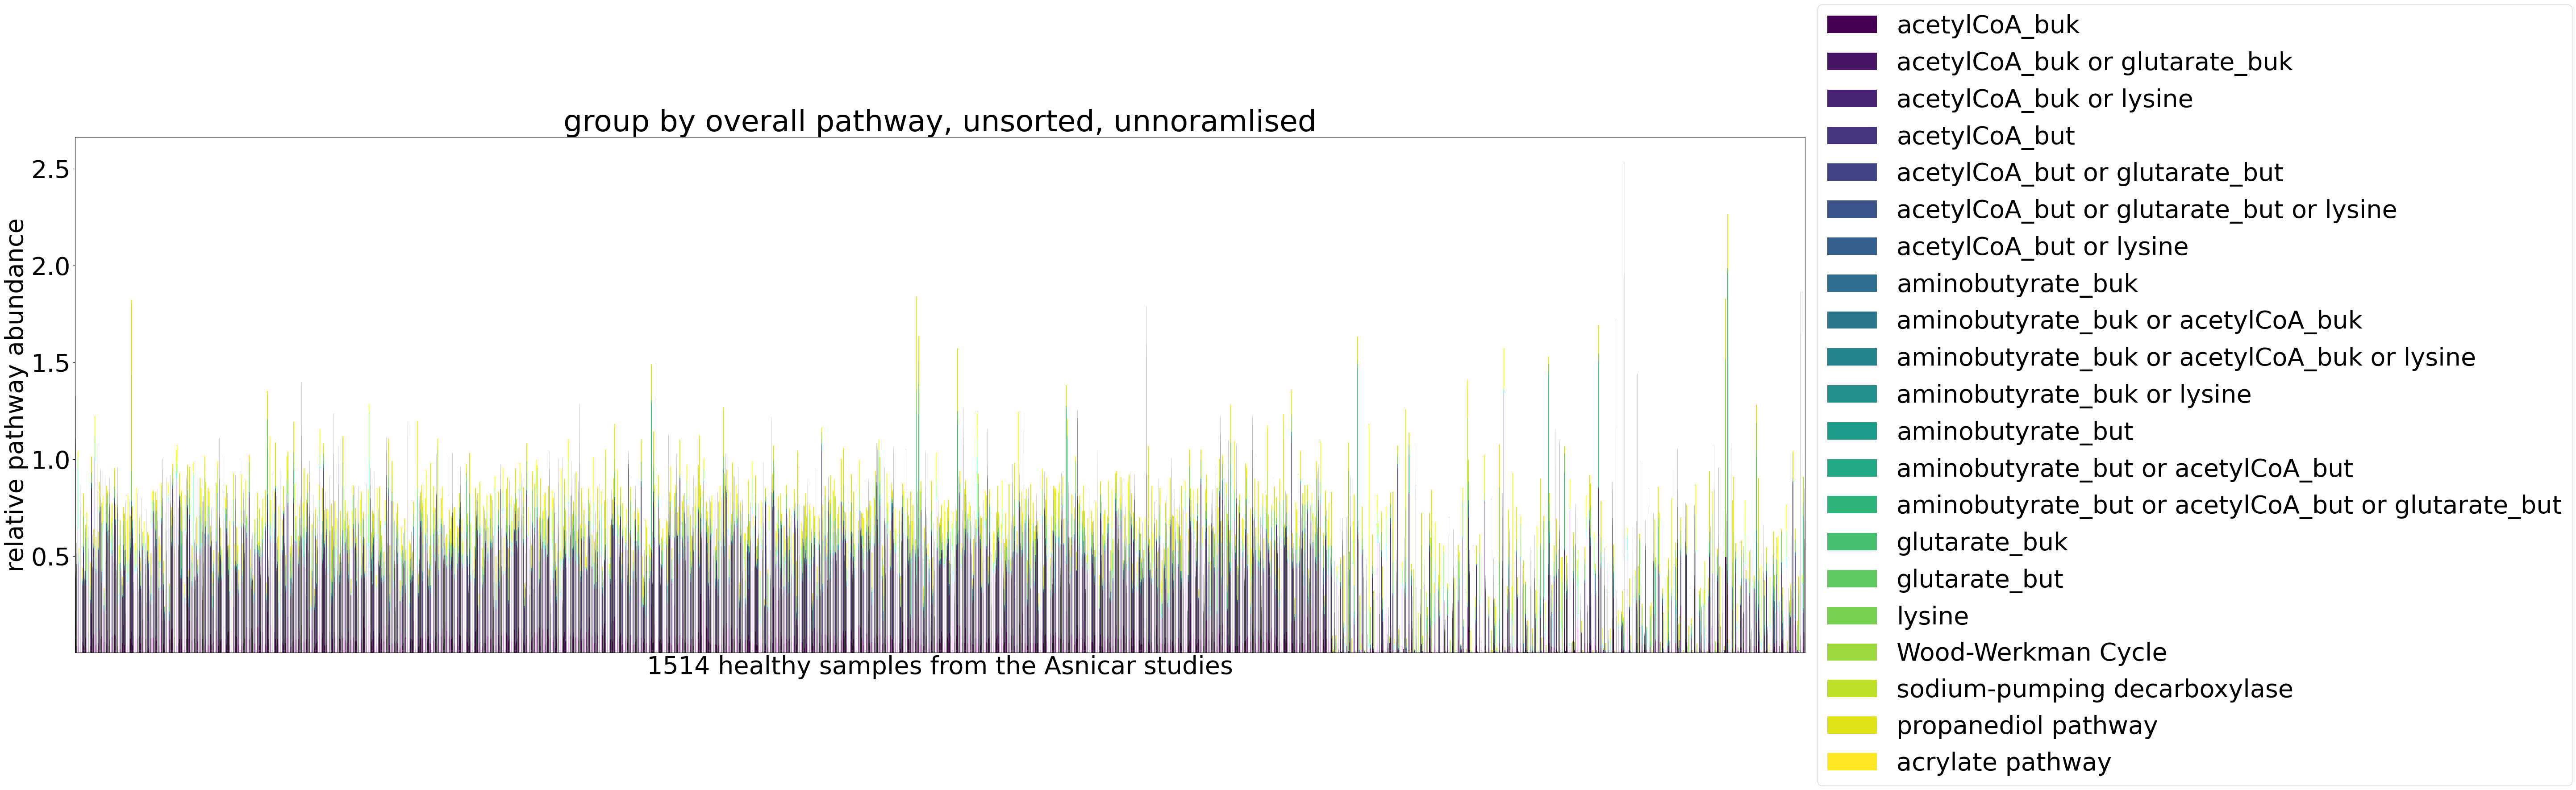

In [22]:
unsorted_unnoramlised_final_graph = plotStackedBar(stackedBarDF(overall_pathway_group), "group by overall pathway, unsorted, unnoramlised")

In [23]:
unsorted_normalised_final_graph = plotStackedBar(stackedBarDF(noramlised_unknown_overall_pathway_group), "group by overall pathway, unsorted, normalised")

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [26]:
def sorted_figures(df, modifier):

    for pathway in list(df.index):

        graph = sortedStackedBar(overall_pathway_group, pathway)

        file_name = modifier + "_" + pathway

        plt.show()

        plt.savefig(pathway)

In [ ]:
# sorted_figures(noramlised_unknown_overall_pathway_group, "normalised")

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_ab

KeyboardInterrupt: 

In [ ]:
sort_normalised_sodium_pumping_decarboxylase_graph = sortedStackedBar(overall_pathway_group, "Wood-Werkman Cycle")

<Figure size 640x480 with 0 Axes>

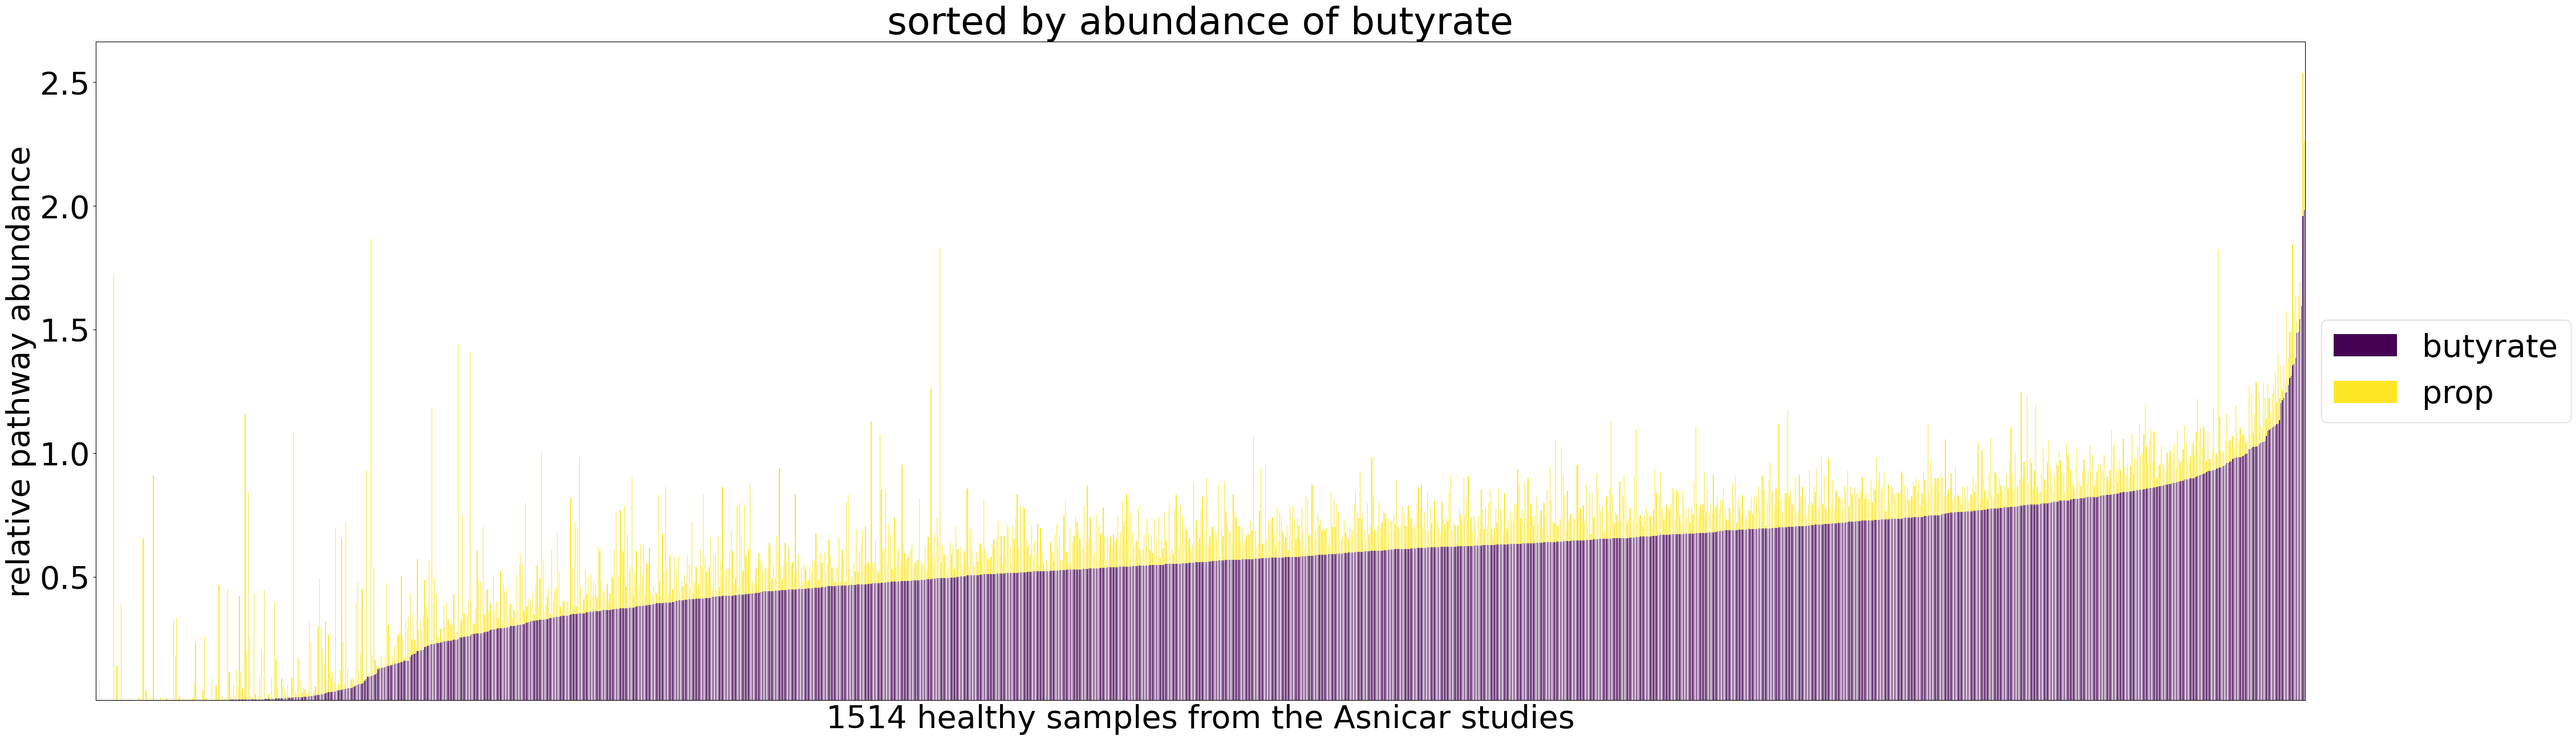

In [ ]:
sort_but_graph = sortedStackedBar(prop_but_groupby, "butyrate")

### making normalised percentage bar charts?

In [25]:
def percentageNormalise(df):

    new = df.copy()

    summed = df.sum(axis=0)

    for row in df.index:

        new.loc[row] = df.loc[row].div(summed)

    return new

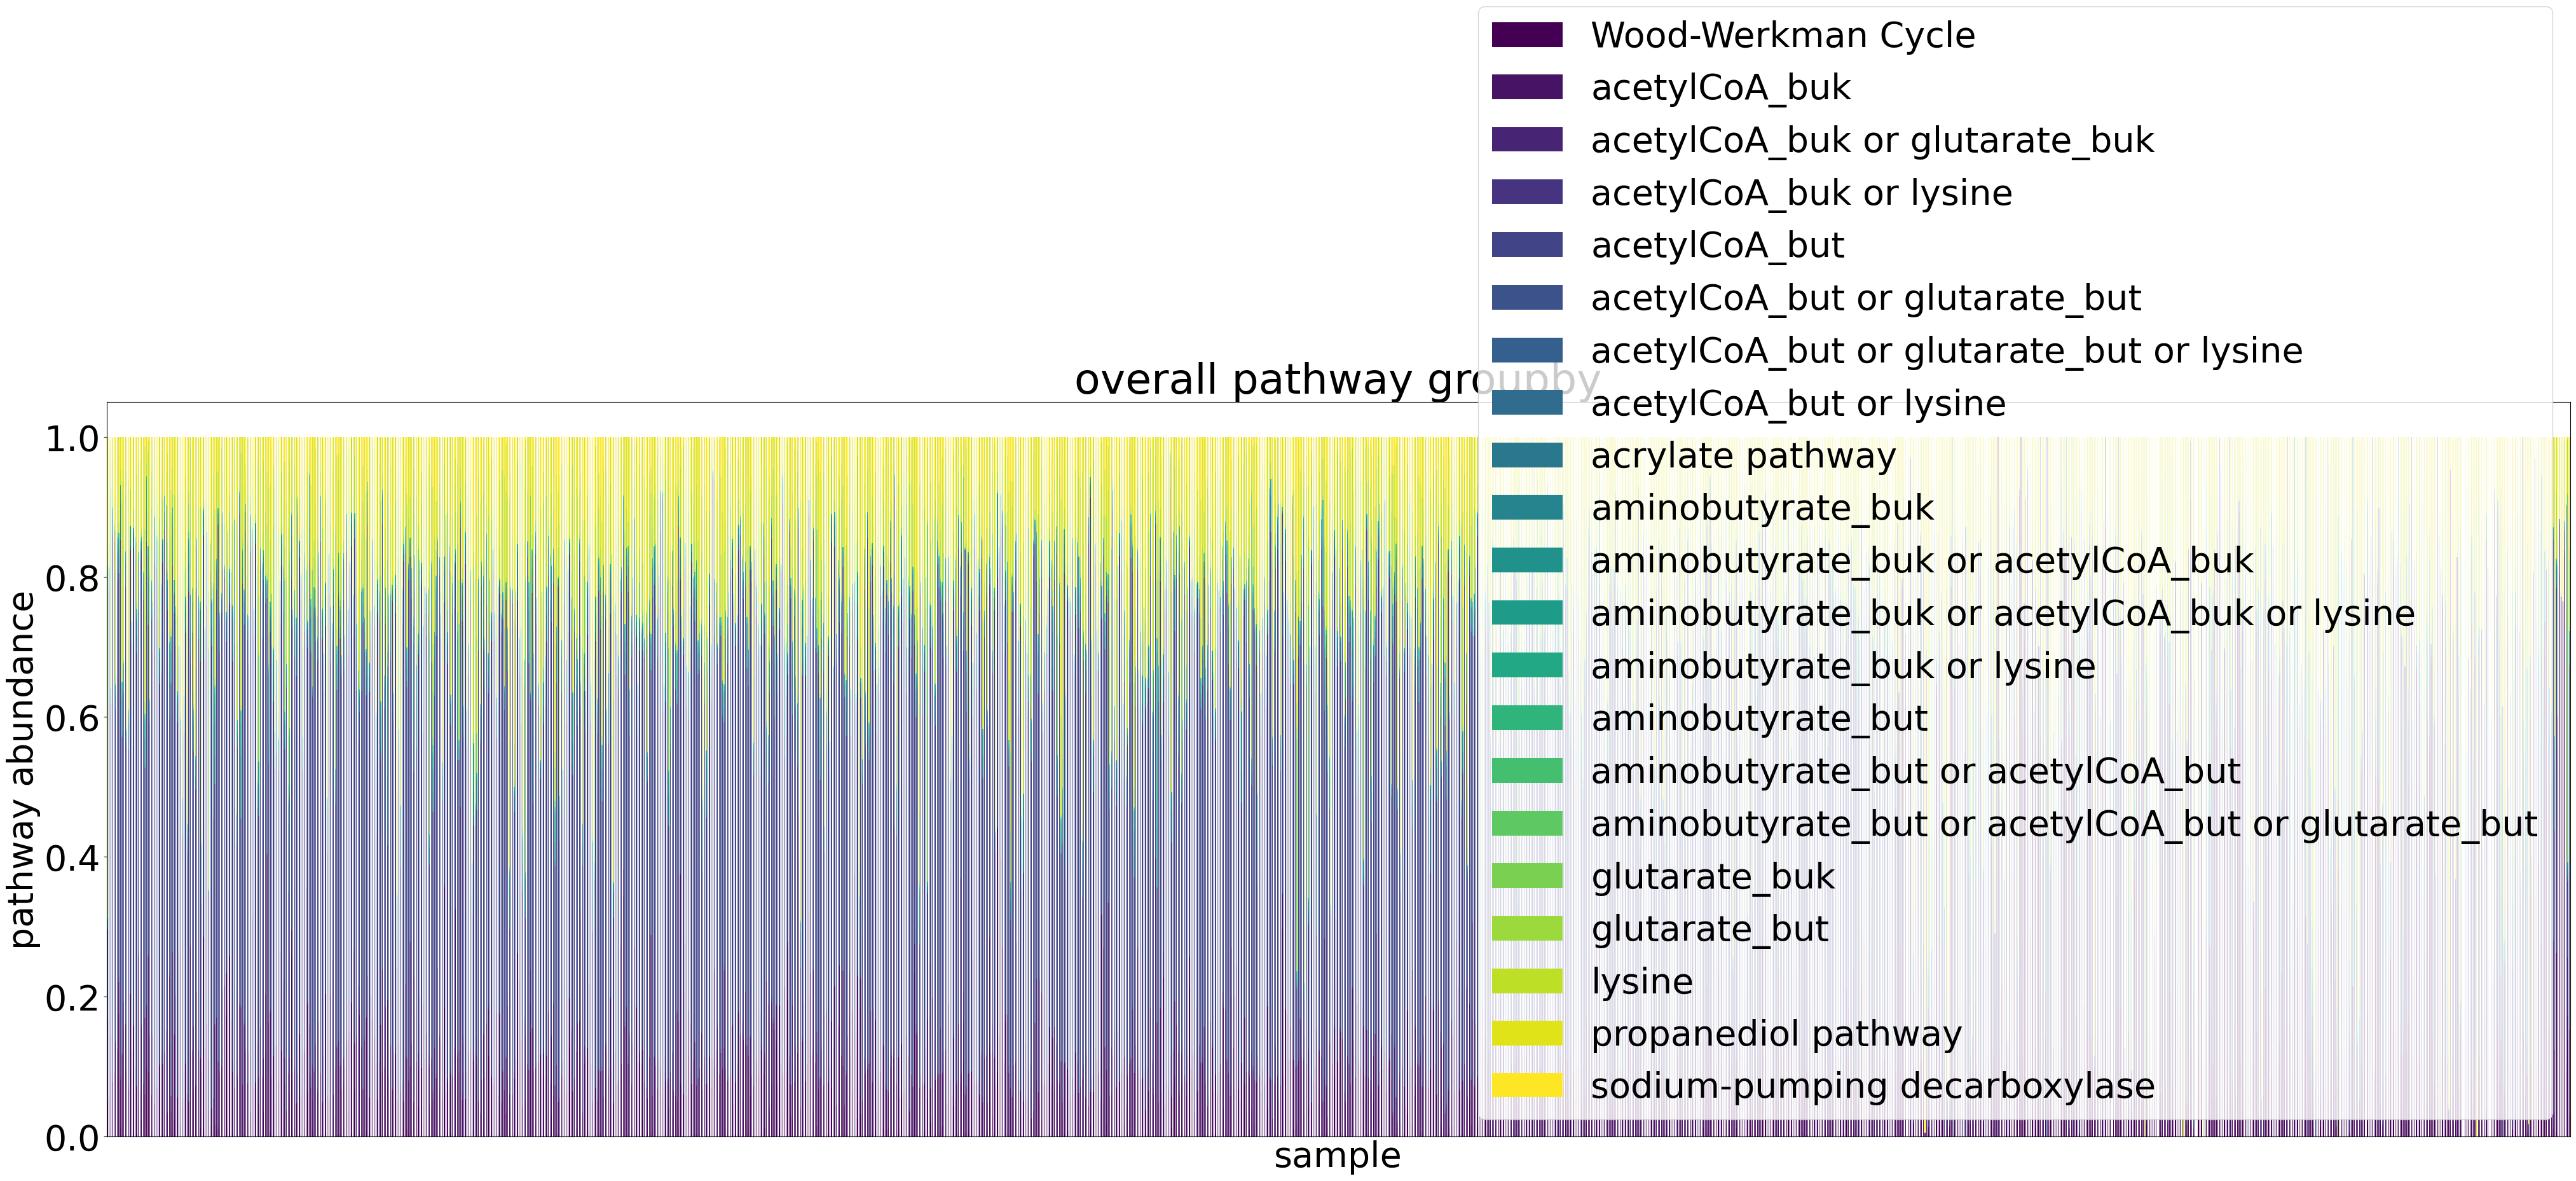

In [ ]:
overall_pathway_unnormalised_group_percent = percentageNormalise(overall_pathway_group)

unsorted_unnormalised_final_graph_percent = plotStackedBar(stackedBarDF(overall_pathway_unnormalised_group_percent))

In [28]:
overall_pathway_normalised_group_percent = percentageNormalise(noramlised_unknown_overall_pathway_group)

unsorted_normalised_final_graph_percent = plotStackedBar(stackedBarDF(overall_pathway_normalised_group_percent), "noramlised unknown overall pathway group")

<Figure size 640x480 with 0 Axes>

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 640x480 with 0 Axes>

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 640x480 with 0 Axes>

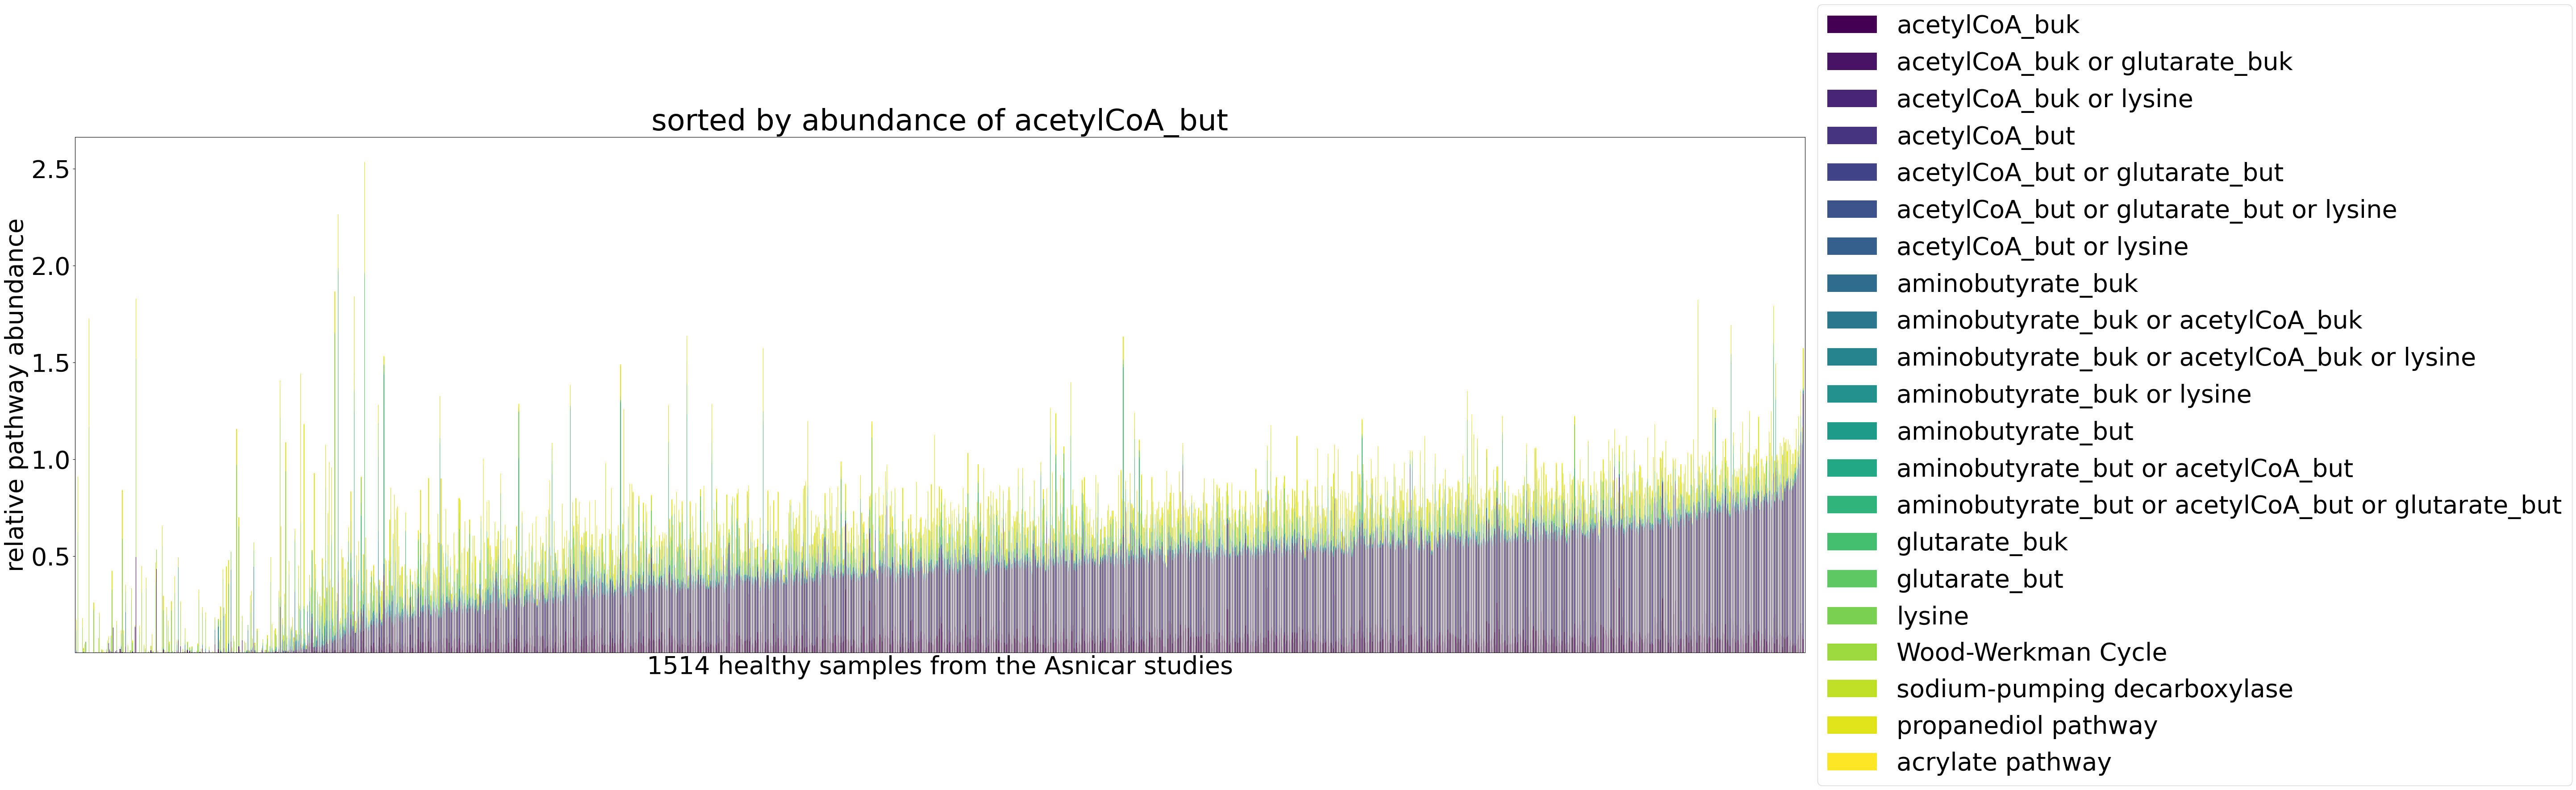

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 640x480 with 0 Axes>

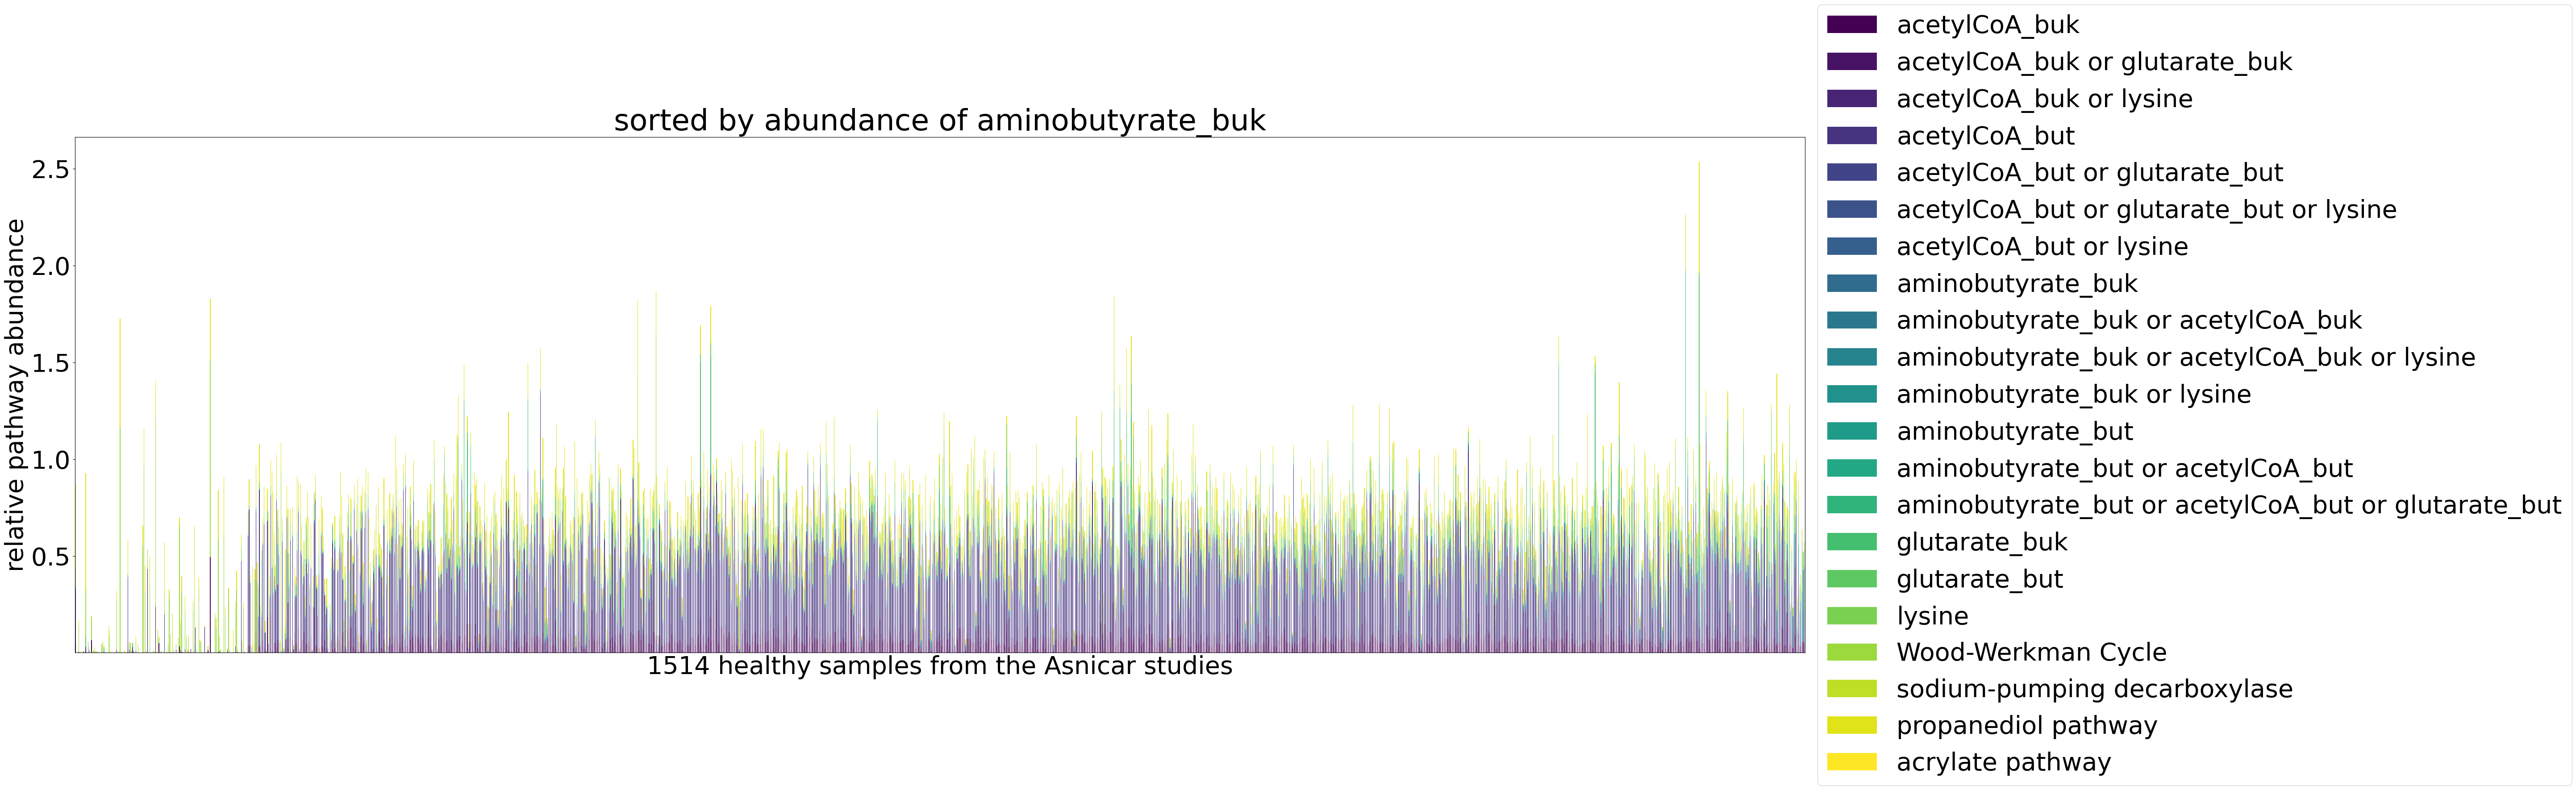

/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/daisy/mambaforge/envs/pathway_abundance/lib/python3.11/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
# sorted_figures(overall_pathway_normalised_group_percent, "normalised_percent")

<Figure size 640x480 with 0 Axes>

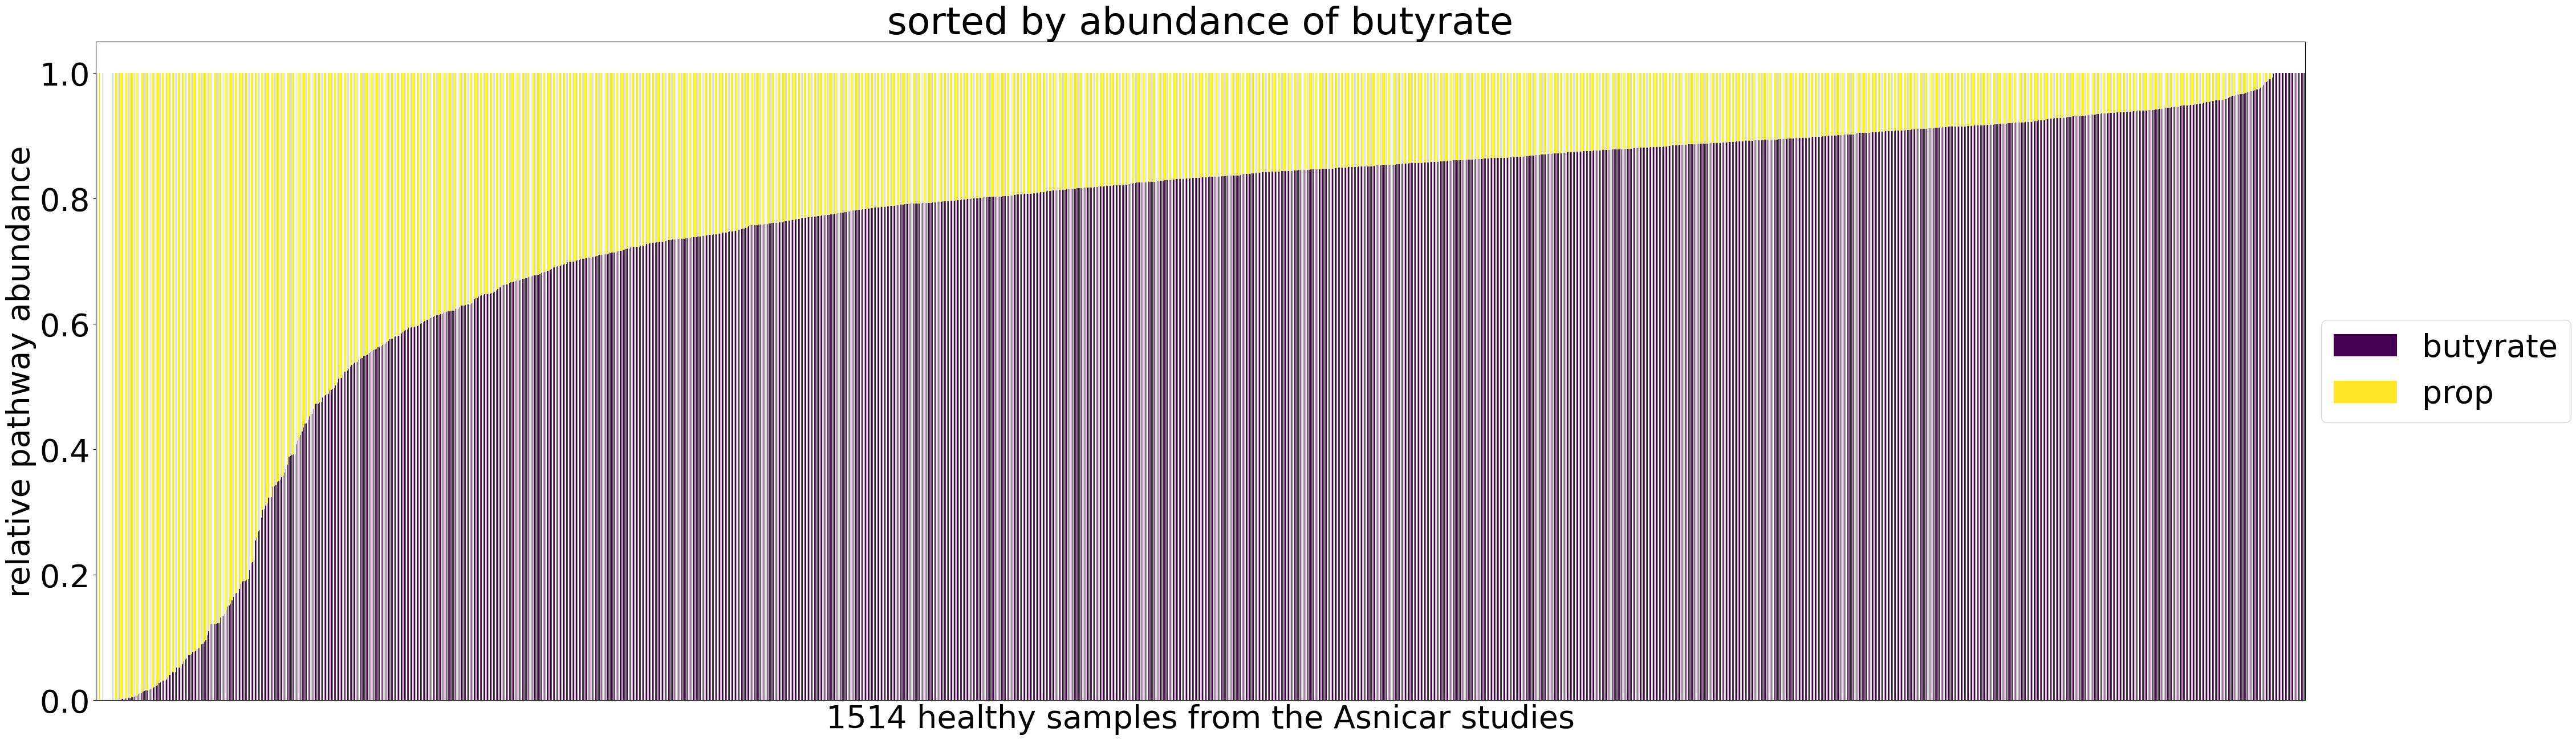

In [ ]:
prop_but_percent = percentageNormalise(prop_but_groupby)

sort_but_normalised = sortedStackedBar(prop_but_percent, "butyrate")

<Figure size 640x480 with 0 Axes>

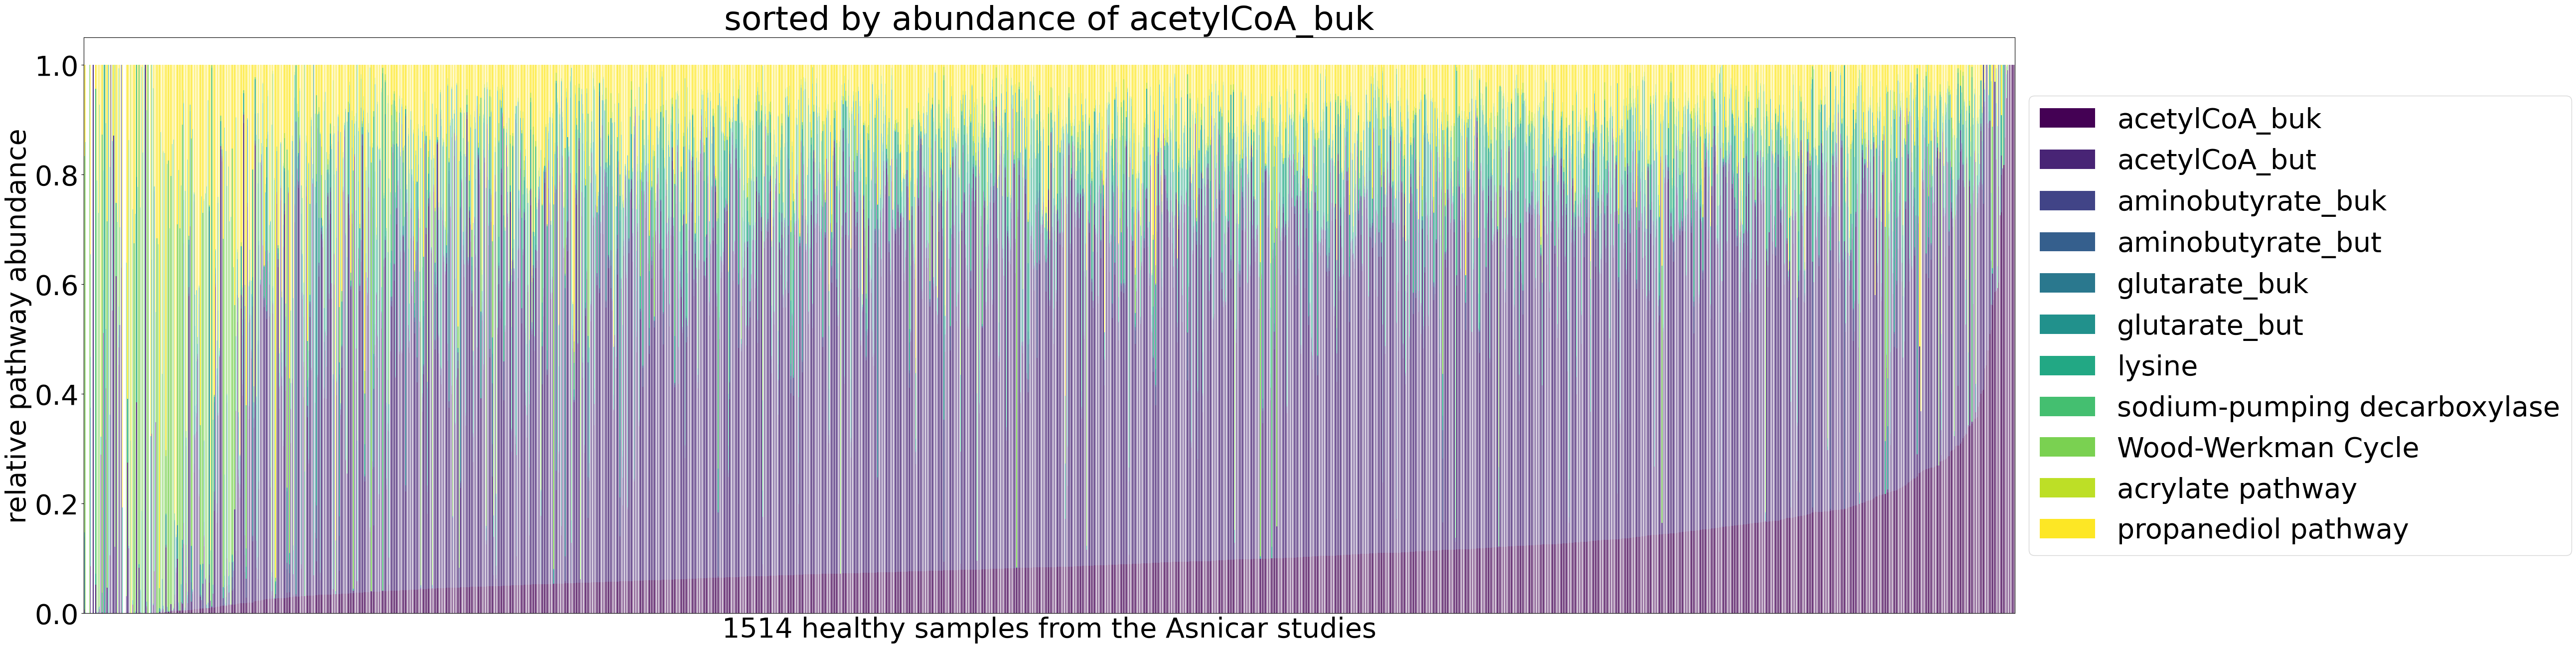

In [29]:
sorted_acetylCoA_buk_normalised_percent = sortedStackedBar(overall_pathway_normalised_group_percent, "acetylCoA_buk")